In [8]:
#Machine Learning HW2
#Carla Martínez

import pandas as pd
wineqt = pd.read_csv('Downloads/WineQT.csv')
wineqt.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [9]:
wineqt.insert(0, 'intercept', 1)
wineqt.head()

,intercept,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
import numpy as np
X = wineqt.drop('quality', axis = 1)
y = wineqt['quality']


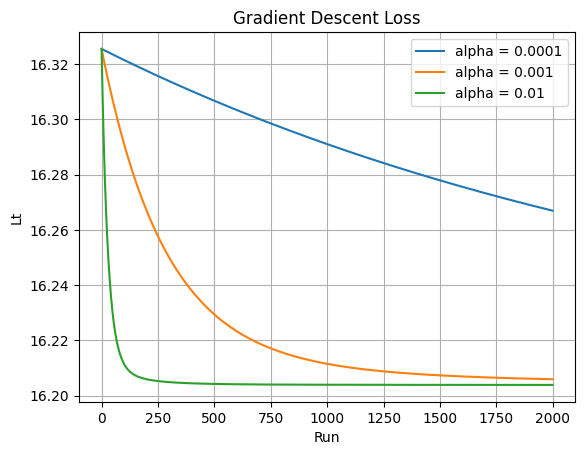

In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X_np = X.values
X_np = StandardScaler().fit_transform(X_np) #standardize
y_np = y.values

n, p = X_np.shape
beta = np.zeros(p) #initialize zeros
alphas = [0.0001, 0.001, 0.01] #different alphas to test
T = 2000
losses = [] #store results
B_compare = [] #store b_grad and b_norm comparison for different alphas

for alpha in alphas: #reinitialize for each alpha
    beta = np.zeros(p)
    losses = []

    for t in range (T):
        y_pred = X_np @ beta #matrix multiplication operator
        e = y_pred - y_np
        g = 1/n * X_np.T @ e #transformation function
        beta = beta - alpha * g
        Lt = (1/(2*n)) * np.dot(e, e)
        losses.append(Lt)
    
    B_norm = np.linalg.pinv(X_np.T @ X_np) @ X_np.T @ y_np
    B_grad = beta
    B_compare.append(np.linalg.norm(B_grad - B_norm) ** 2)
    
    #Disclaimer; I originally tried writing them without the linalg functions in the front, but it threw me an error 
    #So I asked copilot why it was giving me that error for these particular lines, and it told me about these functions.

        
    plt.plot(losses, label = f'alpha = {alpha}')
    
plt.xlabel('Run')
plt.ylabel('Lt')
plt.title('Gradient Descent Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Visually, convergence (decrease of loss until it gets to the minimum loss possible) appears to be optimized at alpha = 0.1,
#where the loss drops dramatically and quickly, approaching the minimum loss around run 250.

#It is not as good in alpha = 0.001, where convergence is slower and reaches the minimum around run 1750.

#In alpha = 0.0001, we don't even remotely reach convergence in 2000 runs.

In [13]:
print(B_compare)

[0.11051525516029621, 0.01681175441532426, 0.0006259207302145946]


In [ ]:
#For alpha = 0.0001, the analytical least squares result is 0.111;
#For alpha = 0.001, the analytical least squares result is 0.0168;
#For alpha = 0.01, the analytical least squares result is 0.000626.

#Alpha = 0.01 has the smallest least squares, which indicates it is the closest to optimal.
#These results match the visual interpretation of which alpha is best.